In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [2]:
mnist = tf.keras.datasets.mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
RESHAPED = 784 
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples') 

Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

60000 train samples
10000 test samples


In [5]:
model = tf.keras.Sequential()
N_hidden = 64

model.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
model.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model.add(Dense(10, name='dense_layer_3', activation = 'softmax'))
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

training = model.fit(X_train, Y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 0.3576 - accuracy: 0.8970 - val_loss: 0.1836 - val_accuracy: 0.9482
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1576 - accuracy: 0.9530 - val_loss: 0.1331 - val_accuracy: 0.9607
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1139 - accuracy: 0.9665 - val_loss: 0.1177 - val_accuracy: 0.9652
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0906 - accuracy: 0.9730 - val_loss: 0.1075 - val_accuracy: 0.9677
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0736 - accuracy: 0.9775 - val_loss: 0.1081 - val_accuracy: 0.9689
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0608 - accuracy: 0.9814 - val_loss: 0.1086 - val_accuracy: 0.9694
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0524 - accuracy: 0.9844 - val_loss: 0.1046 - val_accuracy: 0.9707
Epoch 

In [6]:
print(training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


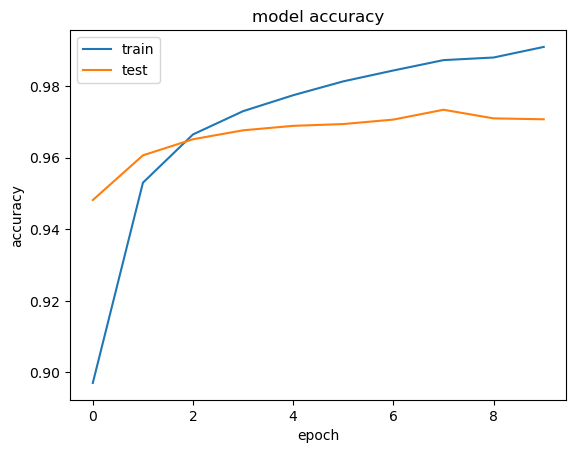

In [7]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

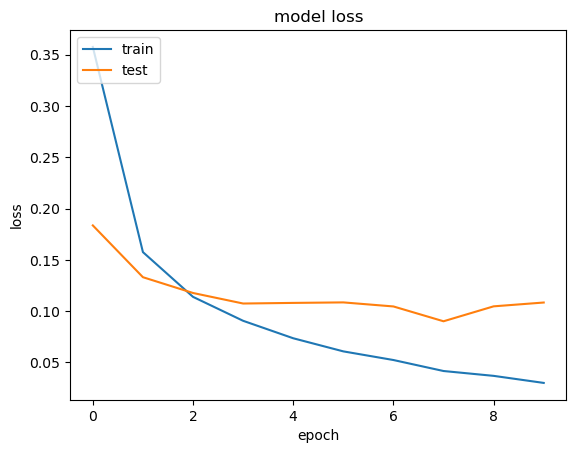

In [8]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1010 - accuracy: 0.9711
Test accuracy: 0.9710999727249146


In [11]:
model.get_config()

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'build_c